# Linear Regression Project

### Imports

In [157]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()


### Loading the data

In [158]:
data = pd.read_csv('../data/car_data.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing

In [159]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [160]:
# Model has 312 unique values, we'll skip it. Also most of the relevant information considering Model can be found in Brand, Year and Engine stats
data = data.drop(['Model'], axis = 1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Missing values

In [161]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [162]:
# We'll remove the missing value rows. Its generally okay when < 5% of rows have missing values
data_complete = data.dropna(axis = 0)

In [163]:
data_complete.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [164]:
data_complete.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Probability distribution functions

##### Price

<Axes: xlabel='Price', ylabel='Count'>

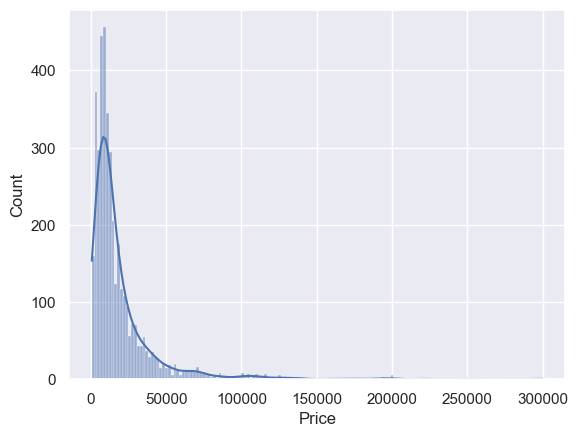

In [165]:
sns.histplot(data_complete['Price'], kde=True)

In [166]:
# Eliminate outliers by removing top percentile from data.
q = data_complete['Price'].quantile(0.99)
q

129812.51999999981

In [167]:
data_1 = data_complete[data_complete['Price'] < q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Price', ylabel='Count'>

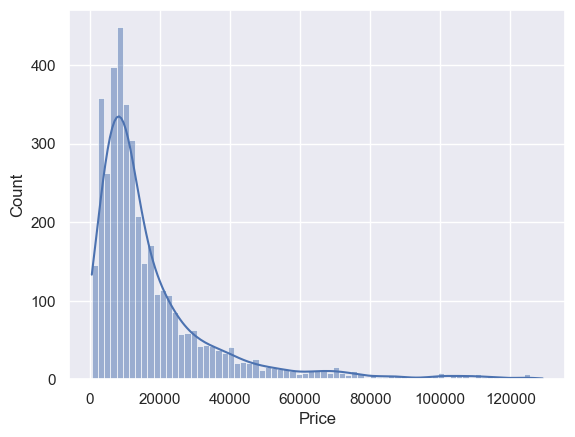

In [168]:
sns.histplot(data_1['Price'], kde=True)

##### Mileage

<Axes: xlabel='Mileage', ylabel='Count'>

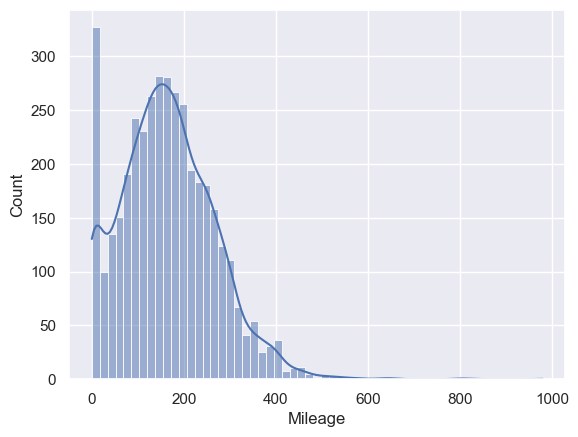

In [169]:
sns.histplot(data_1['Mileage'], kde=True)

In [170]:
# Same as with price, we eliminate outliers by not including the top 1%
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]

<Axes: xlabel='Mileage', ylabel='Count'>

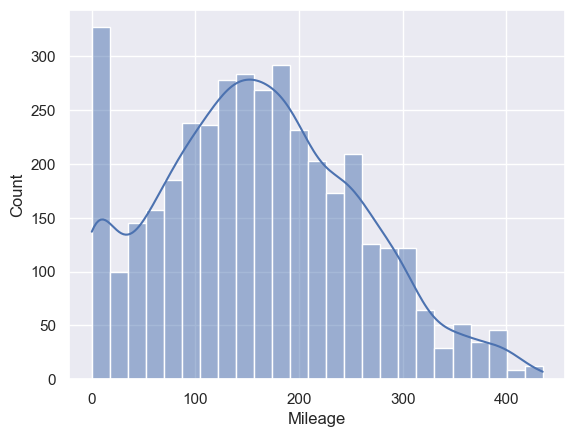

In [171]:
sns.histplot(data_2['Mileage'], kde=True)

##### Engine Volume

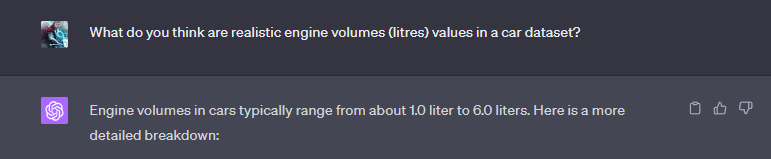

<Axes: xlabel='EngineV', ylabel='Count'>

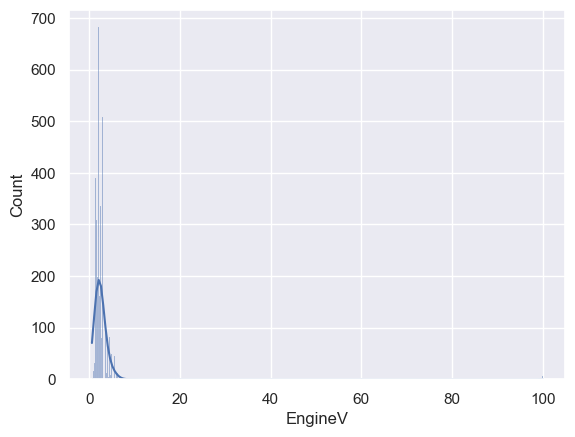

In [172]:
sns.histplot(data_2['EngineV'], kde=True)

In [173]:
data_3 = data_2[data_2['EngineV']<=6.0]

In [174]:
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3905,3905.000000,3905,3905.000000,3905.000000,3905,3905,3905.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1490,NaN,NaN,1818,3543,NaN
mean,NaN,17871.728543,NaN,161.573624,2.427772,NaN,NaN,2006.394110
std,NaN,18960.095237,NaN,96.114429,0.915612,NaN,NaN,6.605474
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


<Axes: xlabel='EngineV', ylabel='Count'>

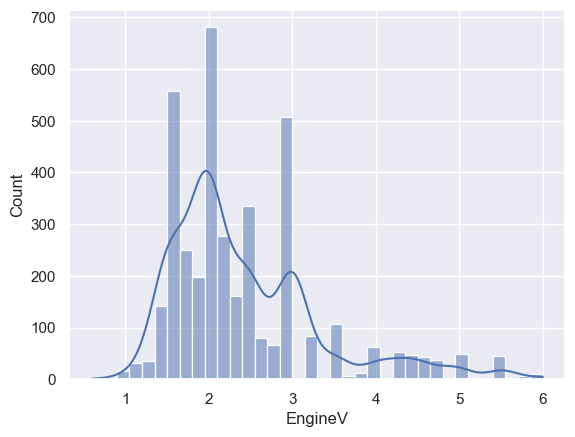

In [175]:
sns.histplot(data_3['EngineV'], kde=True)

##### Year

<Axes: xlabel='Year', ylabel='Count'>

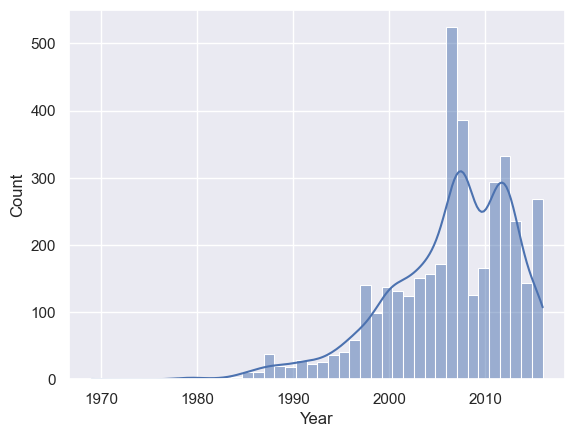

In [176]:
sns.histplot(data_3['Year'], kde = True)

In [177]:
# This time we'll remove the top 1% oldest cars
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]

<Axes: xlabel='Year', ylabel='Count'>

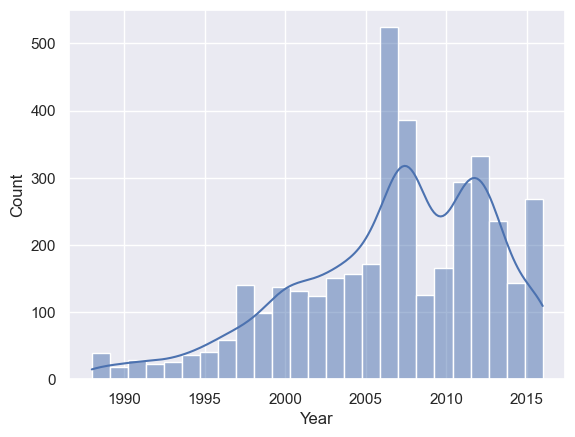

In [178]:
sns.histplot(data_4['Year'], kde = True)

In [179]:
# Checkpoint for complete(no missing values) and cleaned data
# Reset index to fix missing indexes from removing rows. drop=True drops the old index
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011
5,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006
6,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012
7,Volkswagen,1400.0,other,212,1.80,Gas,no,1999
8,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011
9,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994


In [180]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3851,3851.00000,3851,3851.000000,3851.000000,3851,3851,3851.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1458,NaN,NaN,1807,3489,NaN
mean,NaN,18076.98263,NaN,160.837445,2.434524,NaN,NaN,2006.699039
std,NaN,19004.80061,NaN,95.680787,0.918583,NaN,NaN,6.112839
min,NaN,800.00000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.00000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.00000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.00000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


### Checking the OLS assumptions

* In progress.......